# Machine Learning Model for House Price Prediction 

In [1]:
#import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df = pd.read_csv("HousePricePrediction.csv")
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [4]:
df.describe()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [5]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

From the given data we can observe that the target variable or dependent feature 'SalePrice' has 1459 null values almost half the target feature has null values and some of the independent features like MSZoning, Exterior1st, BsmtFinSF2, TotalBsmtSF also contain very less number of null values

In [6]:
#handling nullvalues
#dropping few rows from bigger data will not effect the model so we drop null values from our data for specified features
df.dropna(subset = ['MSZoning','Exterior1st','BsmtFinSF2','TotalBsmtSF'], inplace=True)

Note: 
- In case SalesPrice feature if we drop null values we are gonna lose 50% of the data. 
- But if perform imputation by replacing the null values with the mean of the SalesPrice
- it artificially reduces the variance 
- Model learns fake patterns
- performance becoming misleading
- Introduces strong bias


Imputing target is corrupting ground truth

In [13]:
var_sales = df['SalePrice'].var()
print(f"Varince = {var_sales}")

Varince = 6311111264.297451


In [18]:
df_temp = df.copy()
df_temp.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [20]:
df_temp['SalePrice'] = df_temp['SalePrice'].fillna(df_temp['SalePrice'].mean())
temp_var = df_temp['SalePrice'].var()
print(f"Variance = {temp_var}")

Variance = 3162057463.8083715


We can observe that the variance has changed which shows the effect of change in spread of the data

In [23]:
# The best option to handle null values is dropping them
df.dropna(subset=['SalePrice'], inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotArea       1460 non-null   int64  
 4   LotConfig     1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   OverallCond   1460 non-null   int64  
 7   YearBuilt     1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   Exterior1st   1460 non-null   object 
 10  BsmtFinSF2    1460 non-null   float64
 11  TotalBsmtSF   1460 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 159.7+ KB


Now we have 1460 cleaned data points without null values

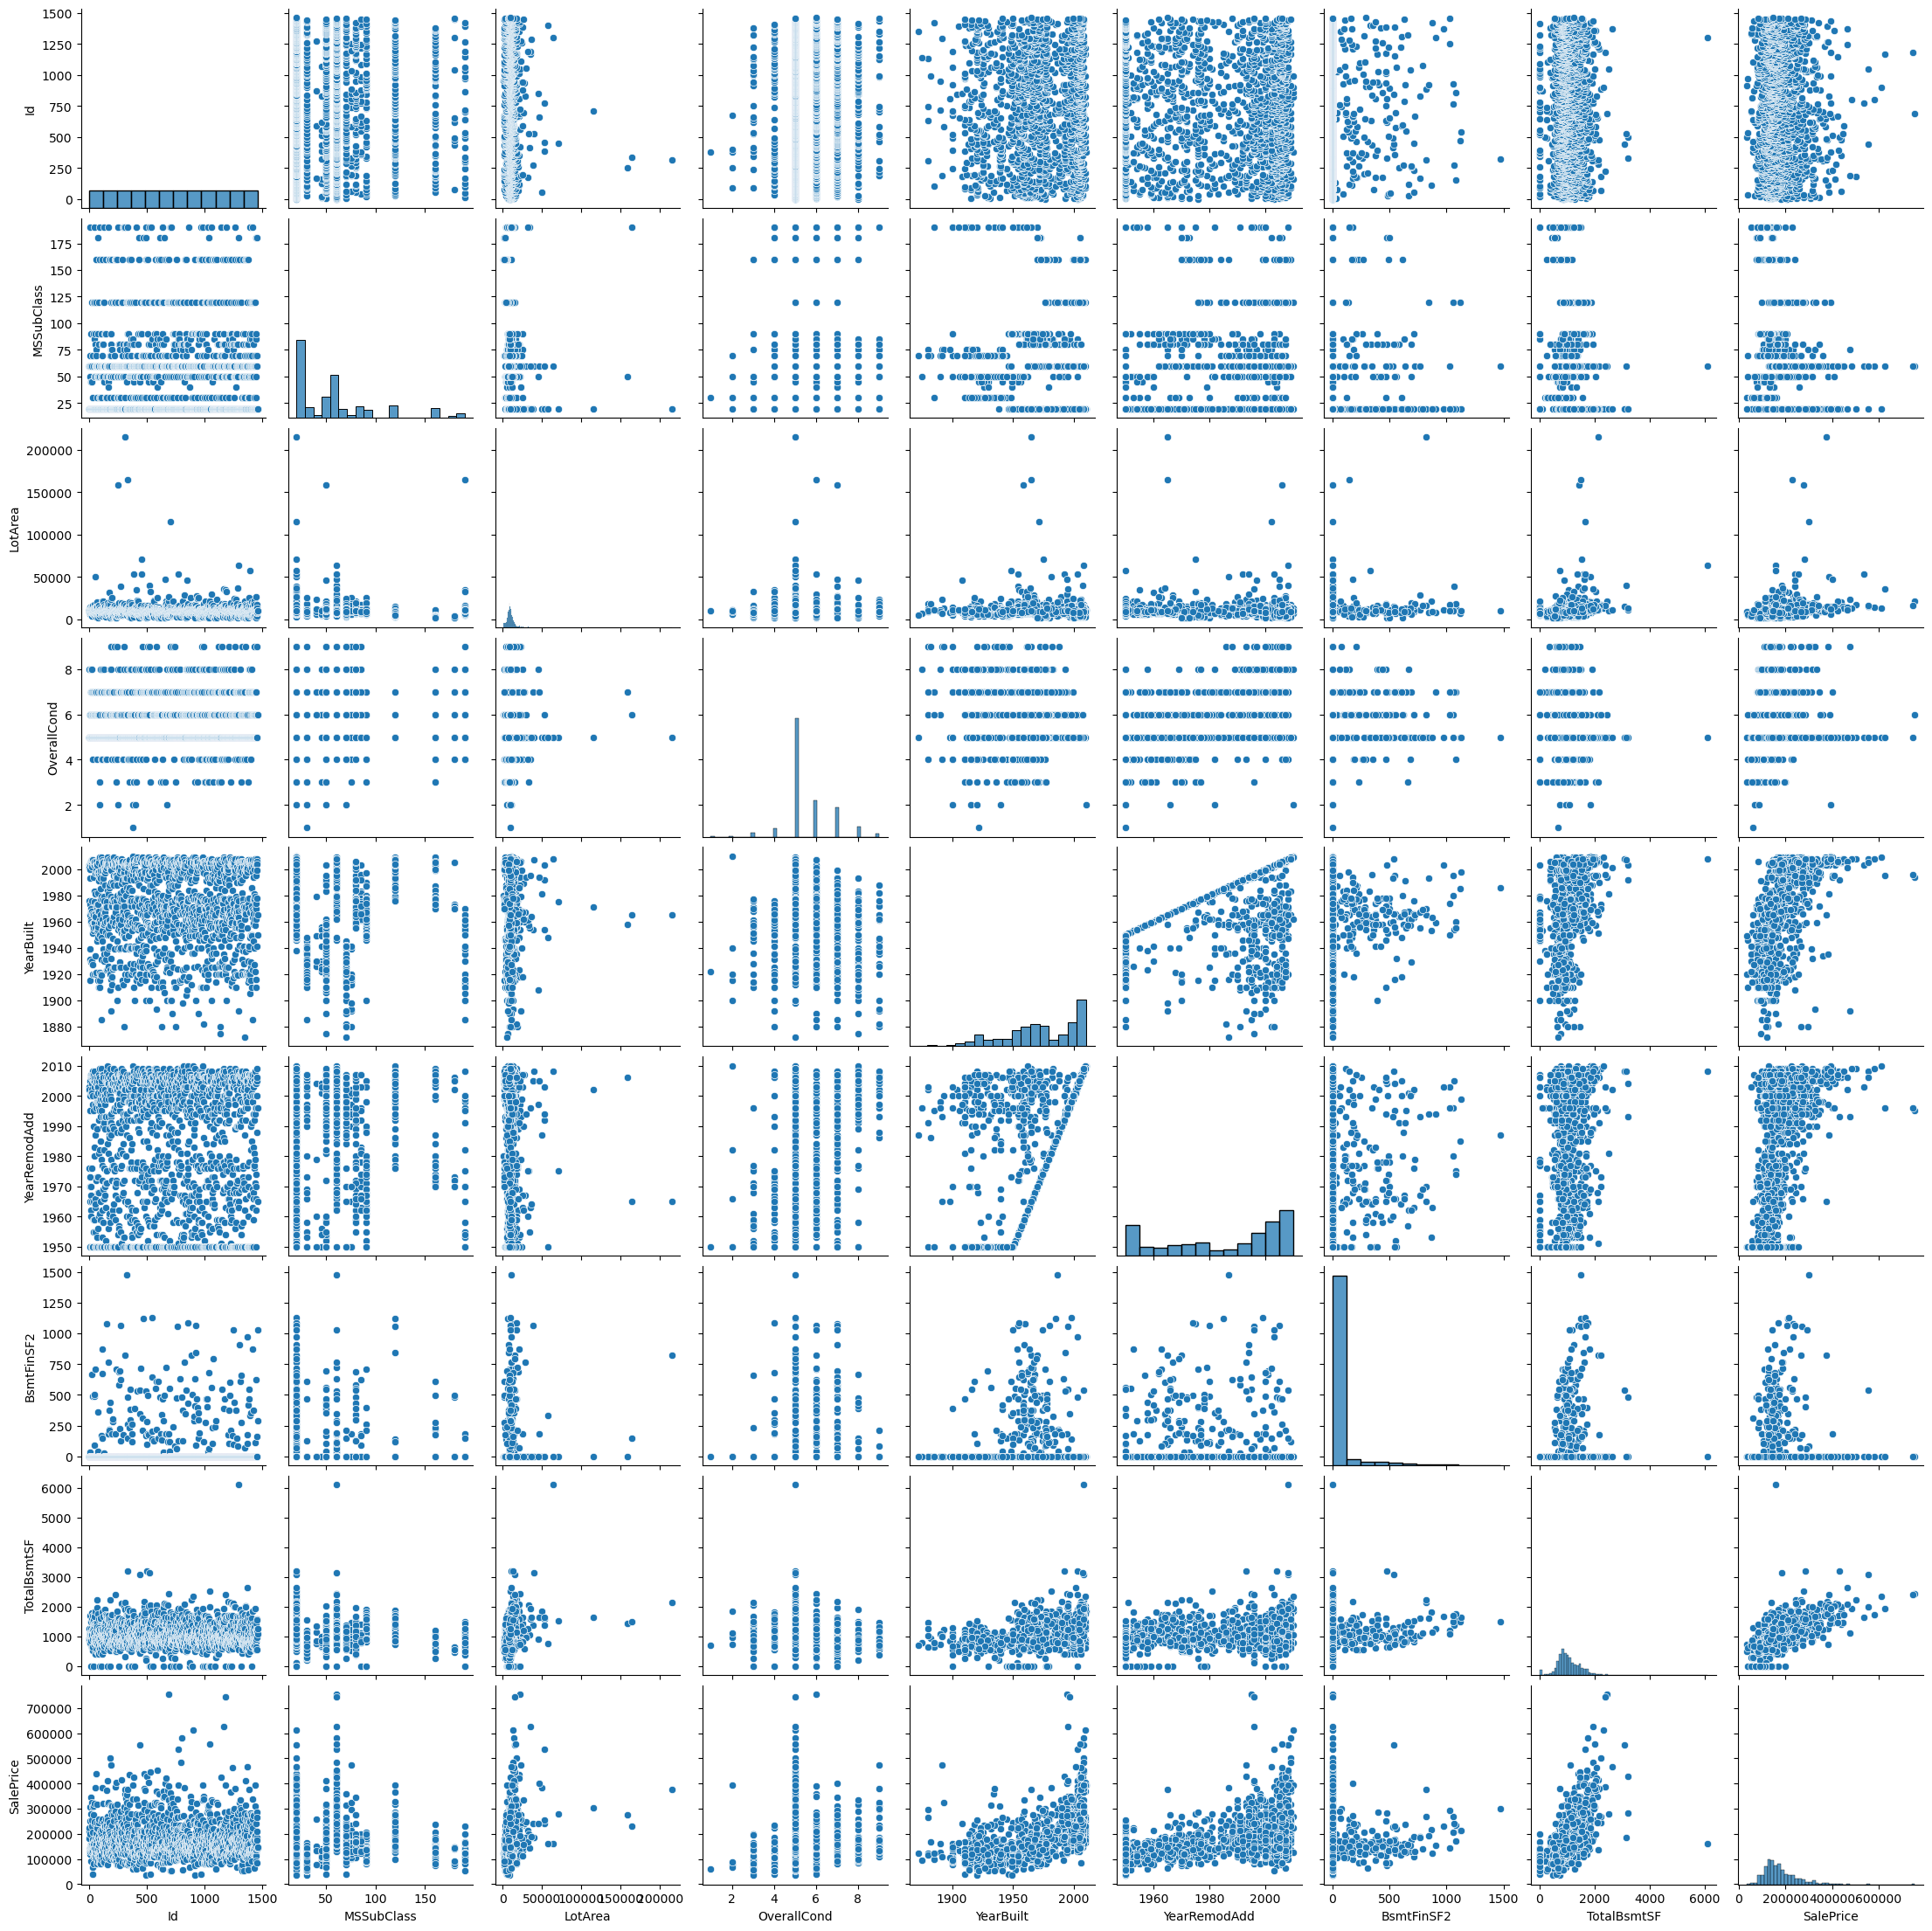

In [25]:
sns.pairplot(df)

Selecting the features from the data to train the model

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotArea       1460 non-null   int64  
 4   LotConfig     1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   OverallCond   1460 non-null   int64  
 7   YearBuilt     1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   Exterior1st   1460 non-null   object 
 10  BsmtFinSF2    1460 non-null   float64
 11  TotalBsmtSF   1460 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 159.7+ KB


- Id, is not very necessary to predict the price of the house
- MSSubclass - Type of dwelling involved in the sales it is categorical data even though it is in numerical form, it does effect the price of the house

Numerical data:
- Lot Area - Bigger land higher the price
- OverallCond - conditions of the house is usually corelated with the price
- YearBuilt - newer the house higher the price
- YearRemodAdd - recently remodeled higher the price
- TotalBsmtSF - total Basement size strongly effects the price of the house
- BsmtFinSF2 - useful but not as compared to totalBSmtSF

Categorical data:
- MSZoning - Residential or commercial type effects the price
- LotConfig - Corner lot, Inside lot might vary the price
- BldgType - Building type(single family, duplex) would change the price
- Exterior1st - Exterior material impacts price


In [29]:
print(df["MSZoning"].unique())
print(df["LotConfig"].unique())
print(df["BldgType"].unique())
print(df["Exterior1st"].unique())
print(df["MSSubClass"].unique())

['RL' 'RM' 'C (all)' 'FV' 'RH']
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
['VinylSd' 'MetalSd' 'Wd Sdng' 'HdBoard' 'BrkFace' 'WdShing' 'CemntBd'
 'Plywood' 'AsbShng' 'Stucco' 'BrkComm' 'AsphShn' 'Stone' 'ImStucc'
 'CBlock']
[ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]


In [30]:
df['MSSubClass'] = df['MSSubClass'].astype(str)

In [31]:
# seperate the independet features and target feature
df = df.drop('Id',axis=1)
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

# identifying types of columns
cat_col = X.select_dtypes(include=['object']).columns
num_col = X.select_dtypes(include=['int64','float64']).columns

Since we can not use object type data for our model we need to encode categories into numbers

In [32]:
#use one-hot encoding to encode categorical features
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression

preprocessor = ColumnTransformer(transformers=[('num',StandardScaler(),num_col),('cat',OneHotEncoder(drop='first',handle_unknown='ignore'),cat_col)])

#model pipeline

model = Pipeline(steps=[('preprocessor',preprocessor),('regressor',LinearRegression())])

In [33]:
#split the data into train data and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#fitting the model
model.fit(X_train,y_train)

#predictions of the model
y_pred = model.predict(X_test)

In [37]:
#Evalution metrics to know how well the model is working
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f"Mean absolute error = {mae}")
print(f"Mean Squared error = {mse}")
print(f"R-squared = {r2}")


Mean absolute error = 32038.149842276773
Mean Squared error = 2571359808.9084716
R-squared = 0.6647652603745722
